In [116]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://images-na.ssl-images-amazon.com/images/I/91arek9tBiL.jpg",width=400, height=400)

# Sharpe Ratio and Portfolio Values

In [38]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

## Creating a Portfolio

 - A portfolio is a set of Investments in a variety of Stocks.

In [8]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2019-01-01')

In [9]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [12]:
aapl.tail()
# Able to grab till 2018.

,Adj. Close
Date,
2018-03-21,171.270
2018-03-22,168.845
2018-03-23,164.940
2018-03-26,172.770
2018-03-27,168.340


In [10]:
aapl.to_csv('AAPL_CLOSE')
cisco.to_csv('CISCO_CLOSE')
ibm.to_csv('IBM_CLOSE')
amzn.to_csv('AMZN_CLOSE')

## Normalize Prices

This is the same as cumulative daily returns

In [14]:
aapl.iloc[-1]['Adj. Close']

168.34

In [15]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [16]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [18]:
aapl.tail()

# We have 30% increase in stock price since 2012

,Adj. Close,Normed Return
Date,,
2018-03-21,171.270,3.240756
2018-03-22,168.845,3.194870
2018-03-23,164.940,3.120980
2018-03-26,172.770,3.269138
2018-03-27,168.340,3.185314


## Allocations

We Imagine we have the following allocations for our total portfolio (total 100% for easy understanding):

* 30% in Apple
* 20% in Cisco
* 40% in Amazon
* 10% in IBM


In [19]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo
    
# Now we have allocated the total 100% in these 4 stocks

In [20]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


## Investment

If we invested 20,000 dollars in this portfolio

In [21]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*20000

In [29]:
aapl.head()
# Now we have how much % of money is invested in each stock and the returns as well.

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,6000.000000
2012-01-04,53.132802,1.005374,0.301612,6032.244729
2012-01-05,53.722681,1.016536,0.304961,6099.214551
2012-01-06,54.284287,1.027162,0.308149,6162.974491
2012-01-09,54.198183,1.025533,0.307660,6153.198940


## Total Portfolio Value

In [30]:
all_pos_vals = [aapl['Position Values'],cisco['Position Values'],
                ibm['Position Values'],amzn['Position Values']]

portfolio_val = pd.concat(all_pos_vals, axis = 1)

In [33]:
portfolio_val.head()

# Here we have the total $20,000 invested in 4 stocks and their returns
# It will be better to have stock names instead of position values as columns

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,6000.000000,4000.000000,8000.000000,2000.000000
2012-01-04,6032.244729,4077.294686,7967.364466,1983.019606
2012-01-05,6099.214551,4062.265164,7929.575953,1984.136737
2012-01-06,6162.974491,4047.235641,7838.539989,2039.993297
2012-01-09,6153.198940,4073.000537,7797.745572,1994.749483


In [34]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [36]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [55]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2018-03-21,19444.533479,11348.923179,7954.898814,17671.451712,56419.807184
2018-03-22,19169.219684,11031.327495,7721.364226,17249.622968,55171.534374
2018-03-23,18725.879326,10864.845887,7558.905382,16707.367480,53856.998075
2018-03-26,19614.830672,11284.891791,7786.347764,17380.997598,56067.067825
2018-03-27,19111.886296,10931.438530,7712.225916,16724.012735,54479.563478


Text(0.5, 1.0, 'Total Portfolio Value')

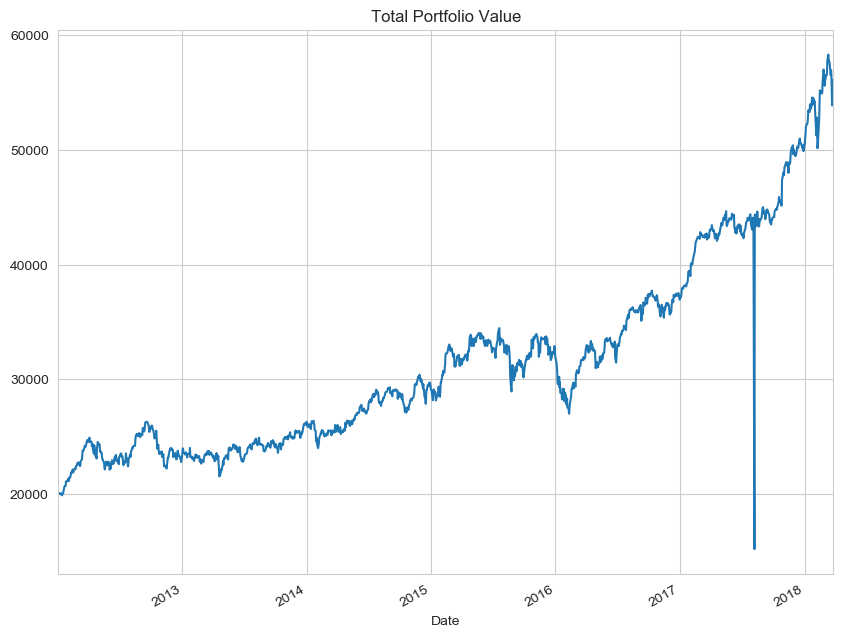

In [94]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

# It appears there was a sudden market fall since september 2018.

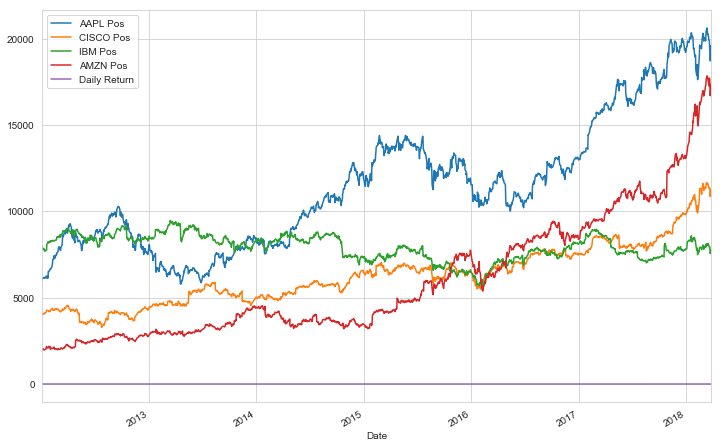

In [100]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(12,8))

# Portfolio Statistics
### Daily Returns
 - The percent returned from 1 day to the next for a stock


In [58]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [60]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,6000.000000,4000.000000,8000.000000,2000.000000,20000.000000,NaN
2012-01-04,6032.244729,4077.294686,7967.364466,1983.019606,20059.923487,0.002996
2012-01-05,6099.214551,4062.265164,7929.575953,1984.136737,20075.192405,0.000761
2012-01-06,6162.974491,4047.235641,7838.539989,2039.993297,20088.743419,0.000675
2012-01-09,6153.198940,4073.000537,7797.745572,1994.749483,20018.694532,-0.003487


### Cumulative Return
 - The amount returned after an entire time period

In [71]:
cumilative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return {} percent!'.format(cumilative_return))

Our return 172.39781738780346 percent!


In [73]:
portfolio_val['Total Pos'][-1]

# the total amount we would have if we had invested $20,000

54479.56347756069

### Avg Daily Return
 - Mean of daily returns

In [63]:
portfolio_val['Daily Return'].mean()

0.001492730590095443

### Std Daily Return
 - std deviation of daily returns (Volatility)

In [64]:
portfolio_val['Daily Return'].std()

0.05213018140551364

# Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

In Canada, I will use a very low risk-free rate (the rate you would get if we put our money in a bank, its currently very low in Canada (0.020), let's just say its ~0% return). In a different country with higher rates for your trading currency, we can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

In [74]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [75]:
SR

0.028634670930524745

In [76]:
ASR = (252**0.5)*SR
# Annual Sharpe ratio

In [77]:
ASR

0.4545613089380338

In [78]:
portfolio_val['Daily Return'].std()

0.05213018140551364

In [79]:
portfolio_val['Daily Return'].mean()

0.001492730590095443

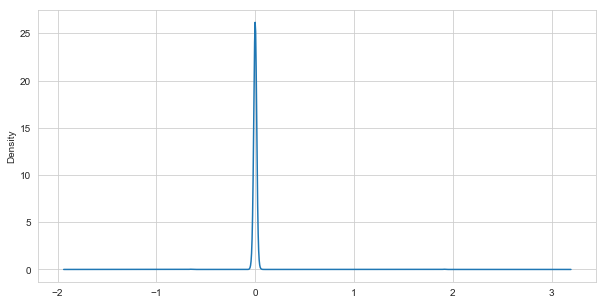

In [106]:
portfolio_val['Daily Return'].plot('kde',figsize=(10,5))

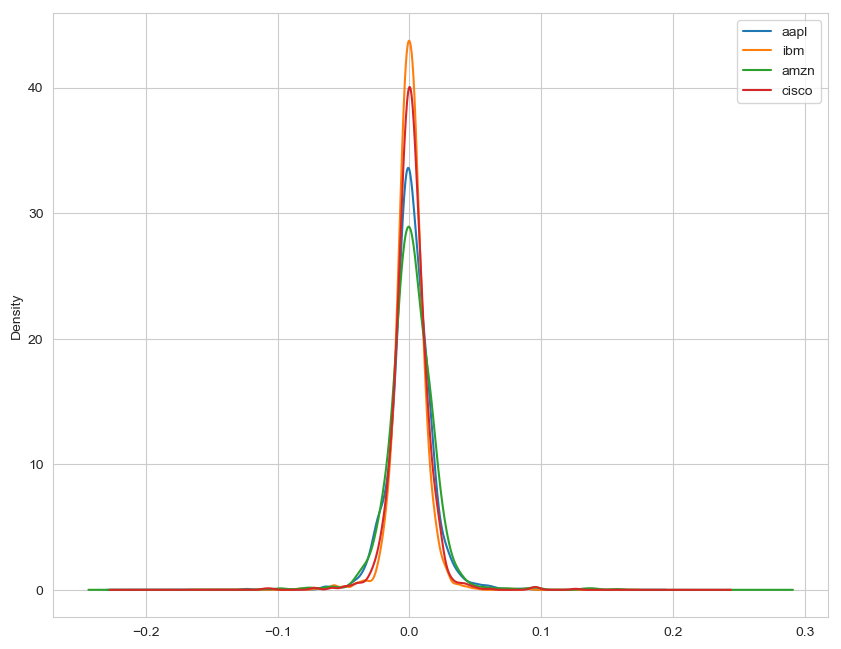

In [90]:
fig, axes = plt.subplots(1, 1, figsize=(10,8),dpi=100)
aapl['Adj. Close'].pct_change(1).plot('kde')
ibm['Adj. Close'].pct_change(1).plot('kde')
amzn['Adj. Close'].pct_change(1).plot('kde')
cisco['Adj. Close'].pct_change(1).plot('kde')
plt.gca().legend(('aapl','ibm','amzn','cisco'))


 - It appears IBM and Cisco stocks gave the maximum returns from the Investment of $20,000